In [1]:
!wget http://cb.lk/covid_19

--2020-10-05 15:14:25--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-10-05 15:14:26--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-10-05 15:14:27--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-10-05 15:14:27--  https://www.dropbox.com/s/raw/7rjw

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation ='sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy,optimizer ='adam',metrics =['accuracy'])

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 54, 54, 64)       

In [9]:
train_datagen = image.ImageDataGenerator(rescale=1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory('CovidDataset/Train',
                                                     target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary')
val_generator = test_datagen.flow_from_directory('CovidDataset/Val',
                             target_size = (224,224),
                             batch_size = 32,
                             class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [14]:
hist = model.fit_generator(train_generator,steps_per_epoch=6,epochs=10,validation_data=val_generator,validation_steps=2)

Epoch 1/10
6/6 [==============================] - 51s 9s/step - loss: 0.6797 - accuracy: 0.5677 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 51s 9s/step - loss: 0.6522 - accuracy: 0.6042 - val_loss: 0.6563 - val_accuracy: 0.9833
Epoch 3/10
6/6 [==============================] - 51s 9s/step - loss: 0.5396 - accuracy: 0.7135 - val_loss: 0.4467 - val_accuracy: 0.9833
Epoch 4/10
6/6 [==============================] - 50s 8s/step - loss: 0.5348 - accuracy: 0.7135 - val_loss: 0.5907 - val_accuracy: 0.9000
Epoch 5/10
6/6 [==============================] - 50s 8s/step - loss: 0.3639 - accuracy: 0.8854 - val_loss: 0.3292 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 48s 8s/step - loss: 0.3438 - accuracy: 0.8490 - val_loss: 0.5306 - val_accuracy: 0.9833
Epoch 7/10
6/6 [==============================] - 50s 8s/step - loss: 0.2758 - accuracy: 0.9271 - val_loss: 0.1380 - val_accuracy: 0.9833
Epoch 8/10
6/6 [==================

In [15]:
hist.history

{'accuracy': [0.5677083134651184,
  0.6041666865348816,
  0.7135416865348816,
  0.7135416865348816,
  0.8854166865348816,
  0.8489583134651184,
  0.9270833134651184,
  0.9114583134651184,
  0.9635416865348816,
  0.9479166865348816],
 'loss': [0.679713249206543,
  0.6522490978240967,
  0.5395733714103699,
  0.5348466038703918,
  0.3638862371444702,
  0.34376800060272217,
  0.2757661044597626,
  0.22120356559753418,
  0.154511958360672,
  0.15396906435489655],
 'val_accuracy': [0.5,
  0.9833333492279053,
  0.9833333492279053,
  0.8999999761581421,
  0.9666666388511658,
  0.9833333492279053,
  0.9833333492279053,
  0.9833333492279053,
  0.9833333492279053,
  0.9833333492279053],
 'val_loss': [0.6878118515014648,
  0.6562723517417908,
  0.4466668665409088,
  0.5906856656074524,
  0.32921740412712097,
  0.530583918094635,
  0.13802869617938995,
  0.26909884810447693,
  0.17447660863399506,
  0.09664861857891083]}

In [16]:
acc= hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

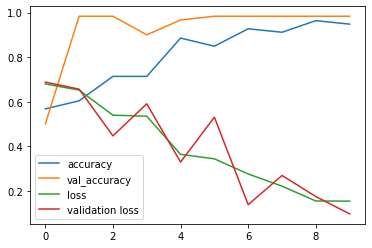

In [18]:
plt.plot(acc,label ='accuracy')
plt.plot(val_acc,label = 'val_accuracy')
plt.plot(loss,label = 'loss')
plt.plot(val_loss,label = 'validation loss')
plt.legend()
plt.show()

In [19]:
model.save("model_adv.h5")

In [20]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.13974528014659882, 0.9598214030265808]

In [21]:
model.evaluate_generator(val_generator)

[0.09664861112833023, 0.9833333492279053]

In [22]:
model = load_model('model_adv.h5')

In [23]:
import os

In [26]:
y_test =[]
y_actual =[]

In [28]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [29]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [30]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [40]:
y_actual = np.array(y_actual,dtype='int8')
y_test = np.array(y_test,dtype='int8')

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [43]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int8)

In [44]:
cm = confusion_matrix(y_actual,y_test)

In [45]:
import seaborn as sns

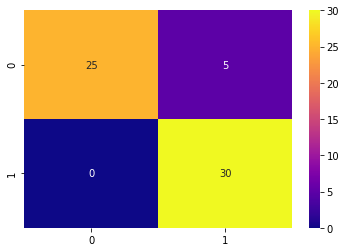

In [46]:
sns.heatmap(cm,cmap="plasma",annot=True)